In [67]:
from pdf2image import convert_from_path

# PDF dosyalarını sayfa sayfa görüntüye çevirme
images_1 = convert_from_path('documents/document_1_1.pdf')
images_2 = convert_from_path('documents/document_1_2.pdf')

In [68]:
images_1

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339>]

In [69]:
import cv2
import numpy as np

def compare_images(image1, image2):
    # Görselleri gri tonlamalıya çevirme
    gray1 = cv2.cvtColor(np.array(image1), cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(np.array(image2), cv2.COLOR_BGR2GRAY)
    
    # Görsellerin farkını bulma
    difference = cv2.absdiff(gray1, gray2)
    
    # Farkın görselleştirilmesi
    _, diff = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)
    
    return diff

# İki PDF dosyasının aynı sayfalarını karşılaştırma
differences = [compare_images(img1, img2) for img1, img2 in zip(images_1, images_2)]
differences

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

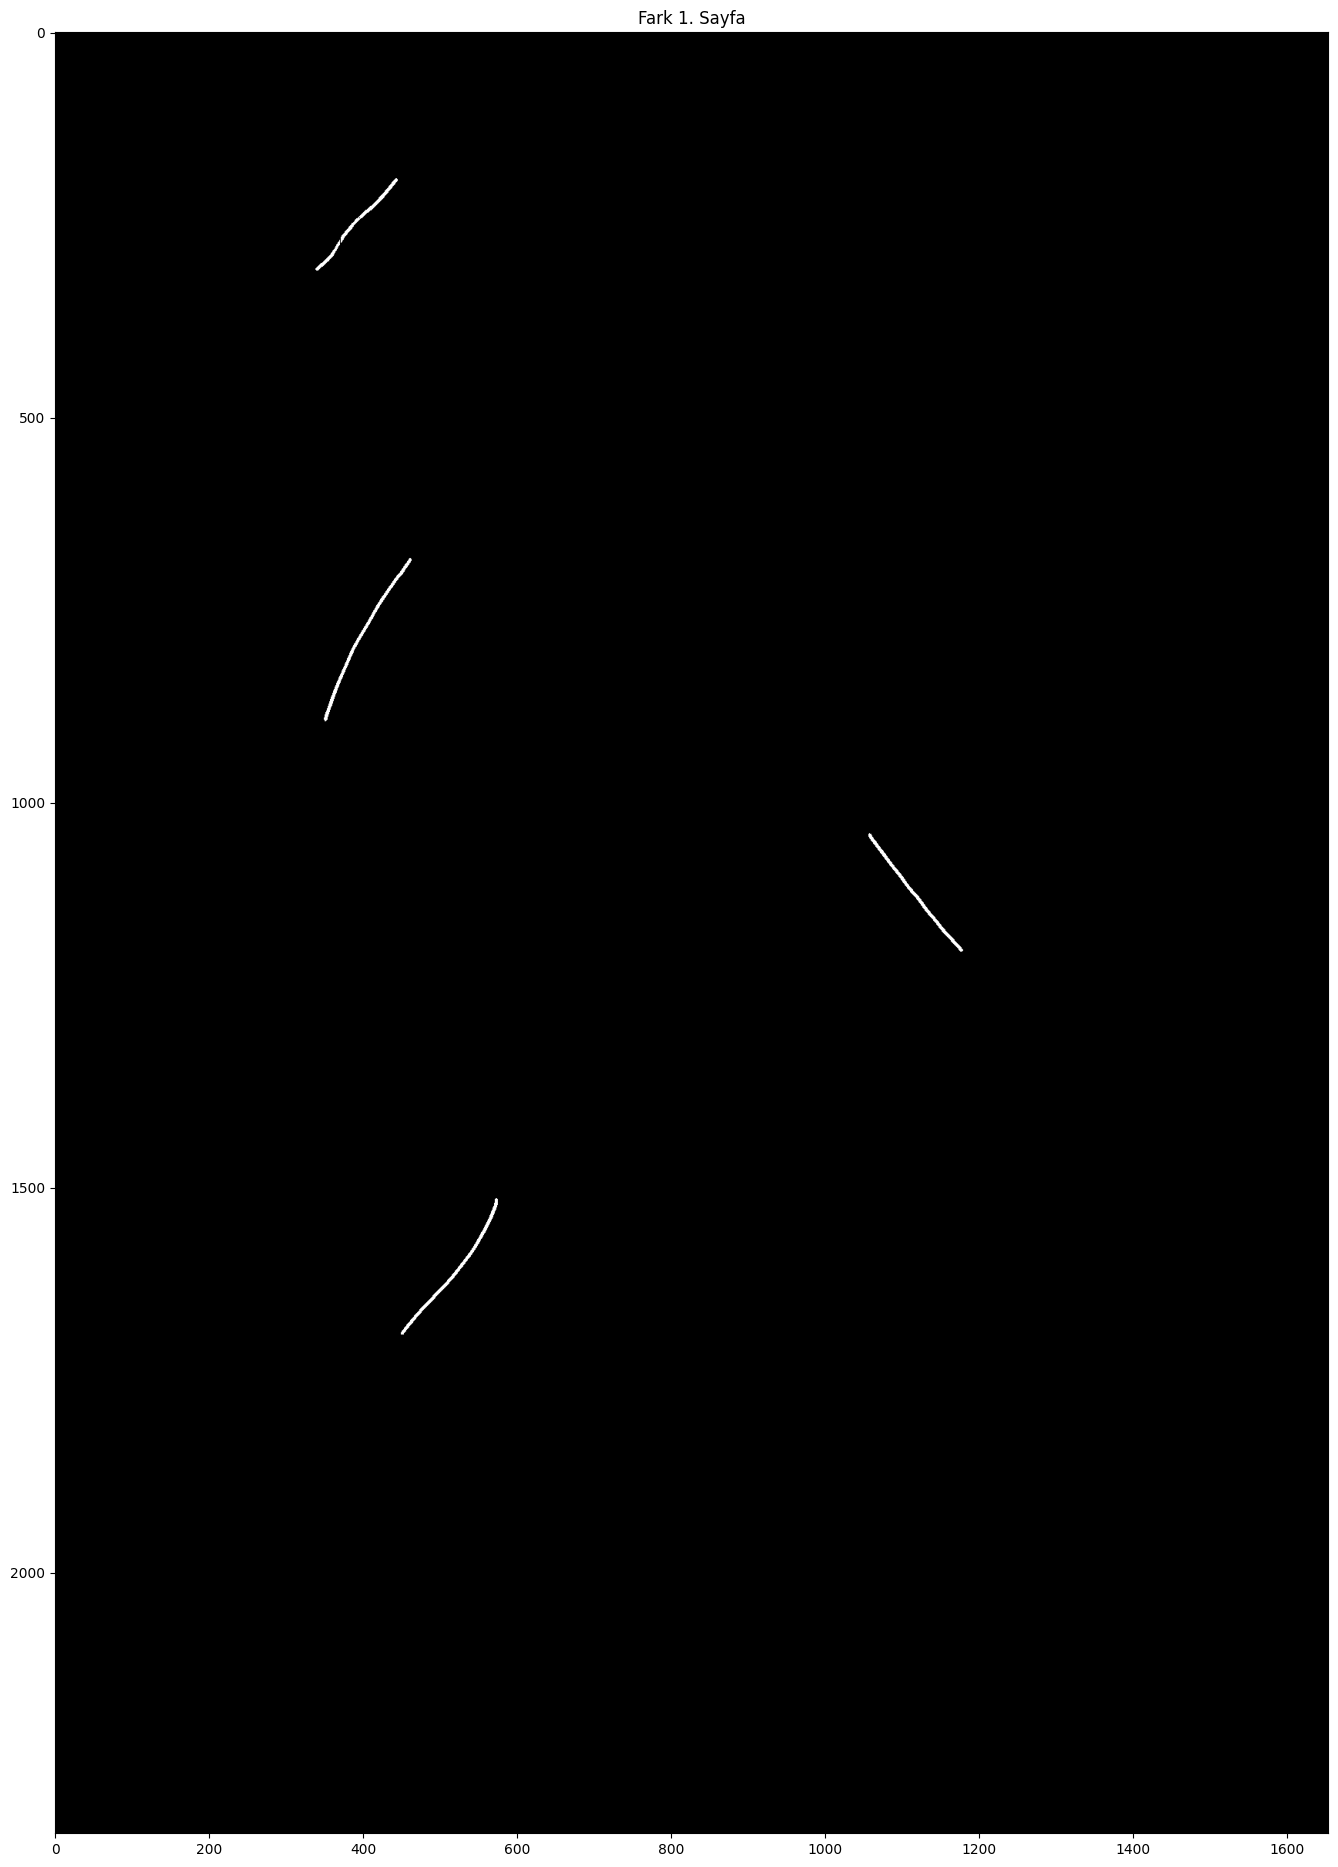

In [70]:
import matplotlib.pyplot as plt

for i, diff in enumerate(differences):
    # Resim boyutlarına göre figsize hesaplama
    height, width = diff.shape
    dpi = 100  # DPI değeri
    figsize = (width / dpi, height / dpi)
    # Görüntü boyutunu ayarlama
    plt.figure(figsize=figsize)
    plt.imshow(diff, cmap='gray')
    plt.title(f'Fark {i+1}. Sayfa')
    plt.show()

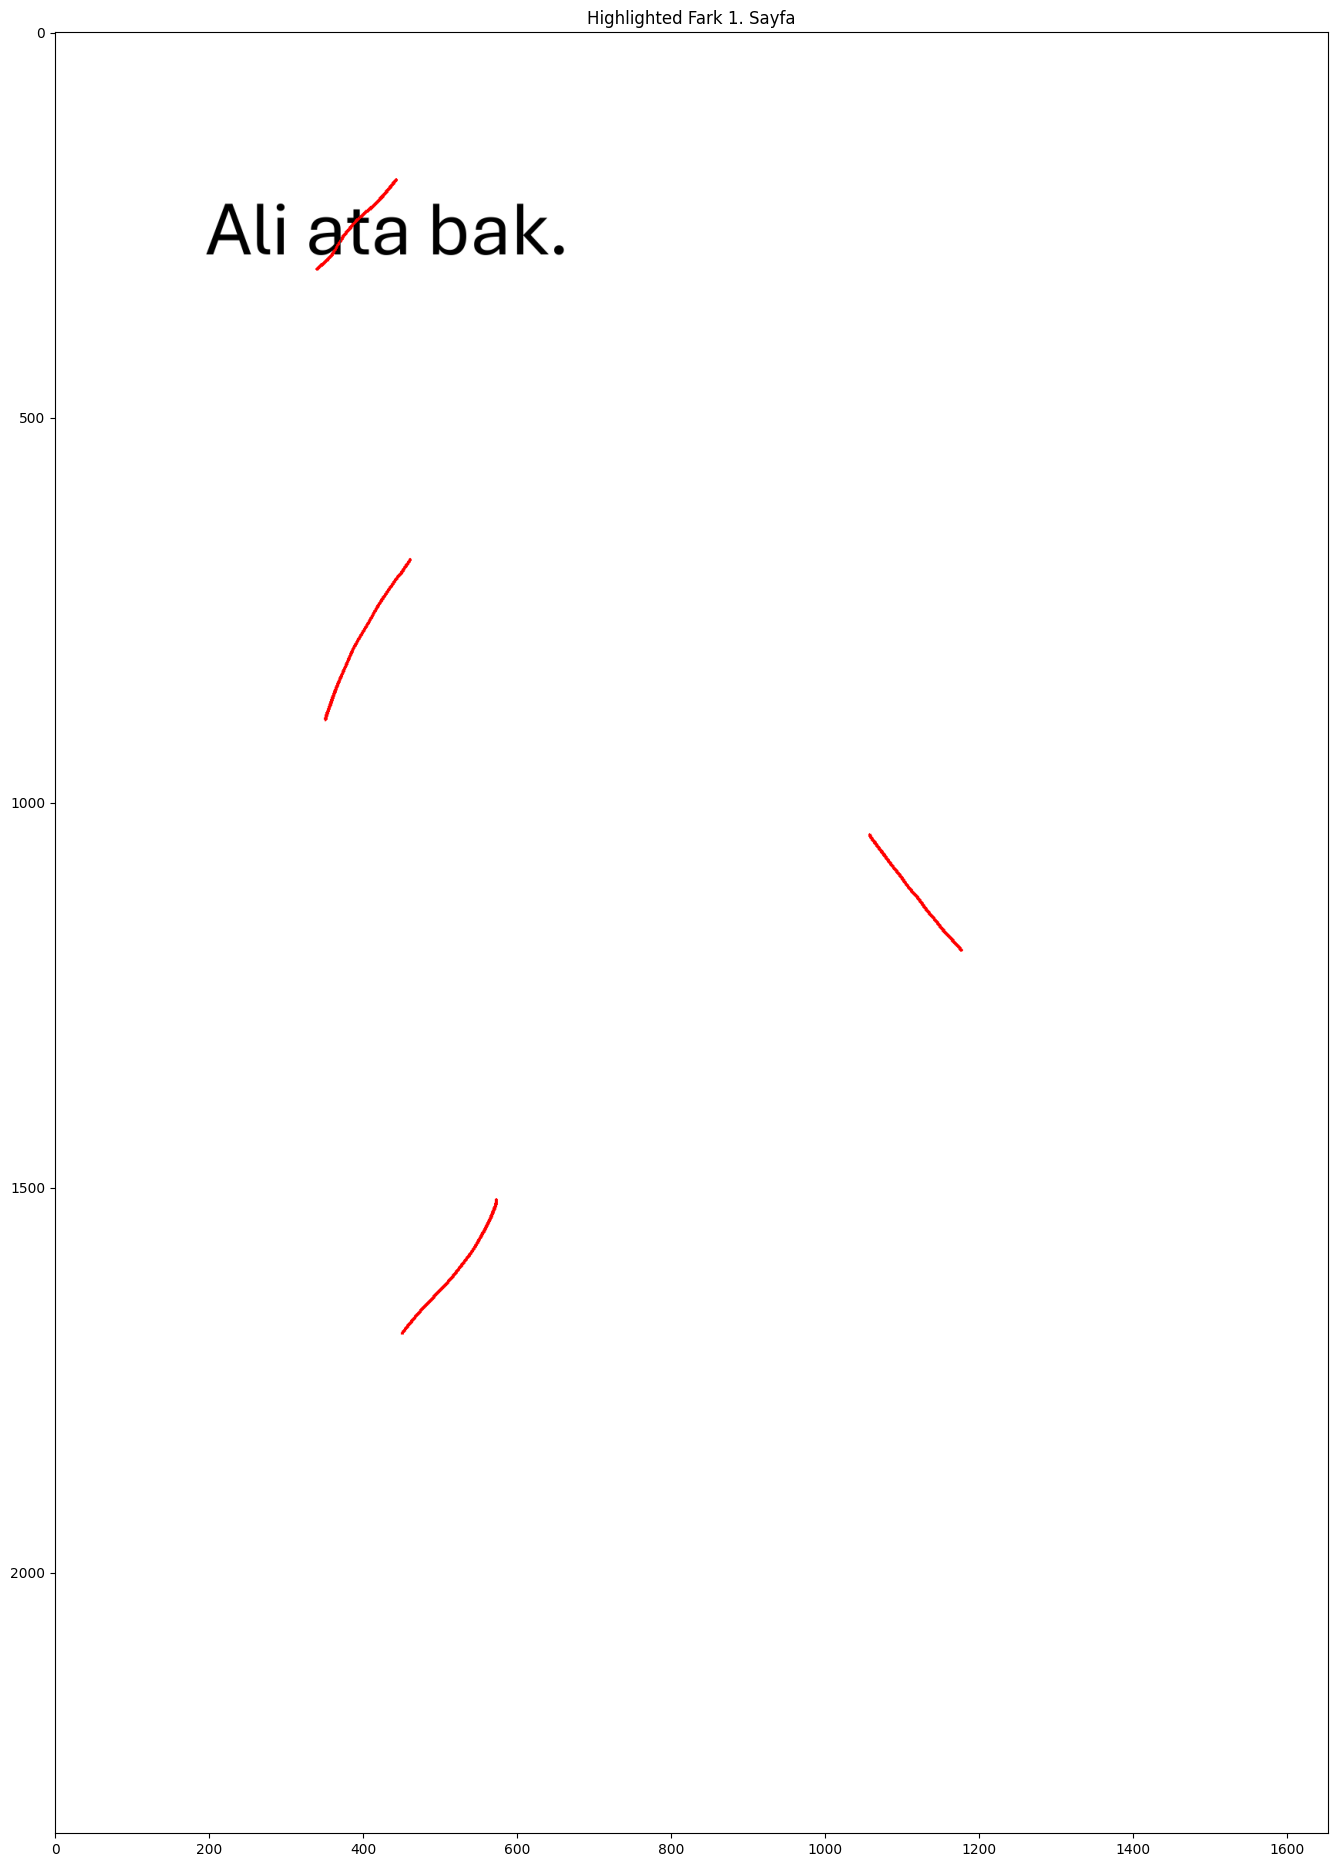

In [71]:
# 1. Farkları Renkli Olarak Vurgulama
import cv2
import numpy as np

def highlight_differences(image1, image2):
    # Görselleri gri tonlamalıya çevirme
    gray1 = cv2.cvtColor(np.array(image1), cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(np.array(image2), cv2.COLOR_BGR2GRAY)
    
    # Görsellerin farkını bulma
    difference = cv2.absdiff(gray1, gray2)
    
    # Farkın görselleştirilmesi
    _, diff = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)
    
    # Fark olan pikselleri kırmızı renkte vurgulama
    image_diff_colored = np.array(image1).copy()
    image_diff_colored[diff != 0] = [255, 0, 0]  # Kırmızı rengi kullanarak farkı işaretleme
    
    return image_diff_colored

# İki PDF dosyasının aynı sayfalarını karşılaştırma
highlighted_differences = [highlight_differences(img1, img2) for img1, img2 in zip(images_1, images_2)]

# Farklılıkları görselleştirme
for i, highlighted_diff in enumerate(highlighted_differences):
    # Resim boyutlarına göre figsize hesaplama
    height, width = diff.shape
    dpi = 100  # DPI değeri
    figsize = (width / dpi, height / dpi)
    # Görüntü boyutunu ayarlama
    plt.figure(figsize=figsize)
    plt.imshow(highlighted_diff)
    plt.title(f'Highlighted Fark {i+1}. Sayfa')
    plt.show()

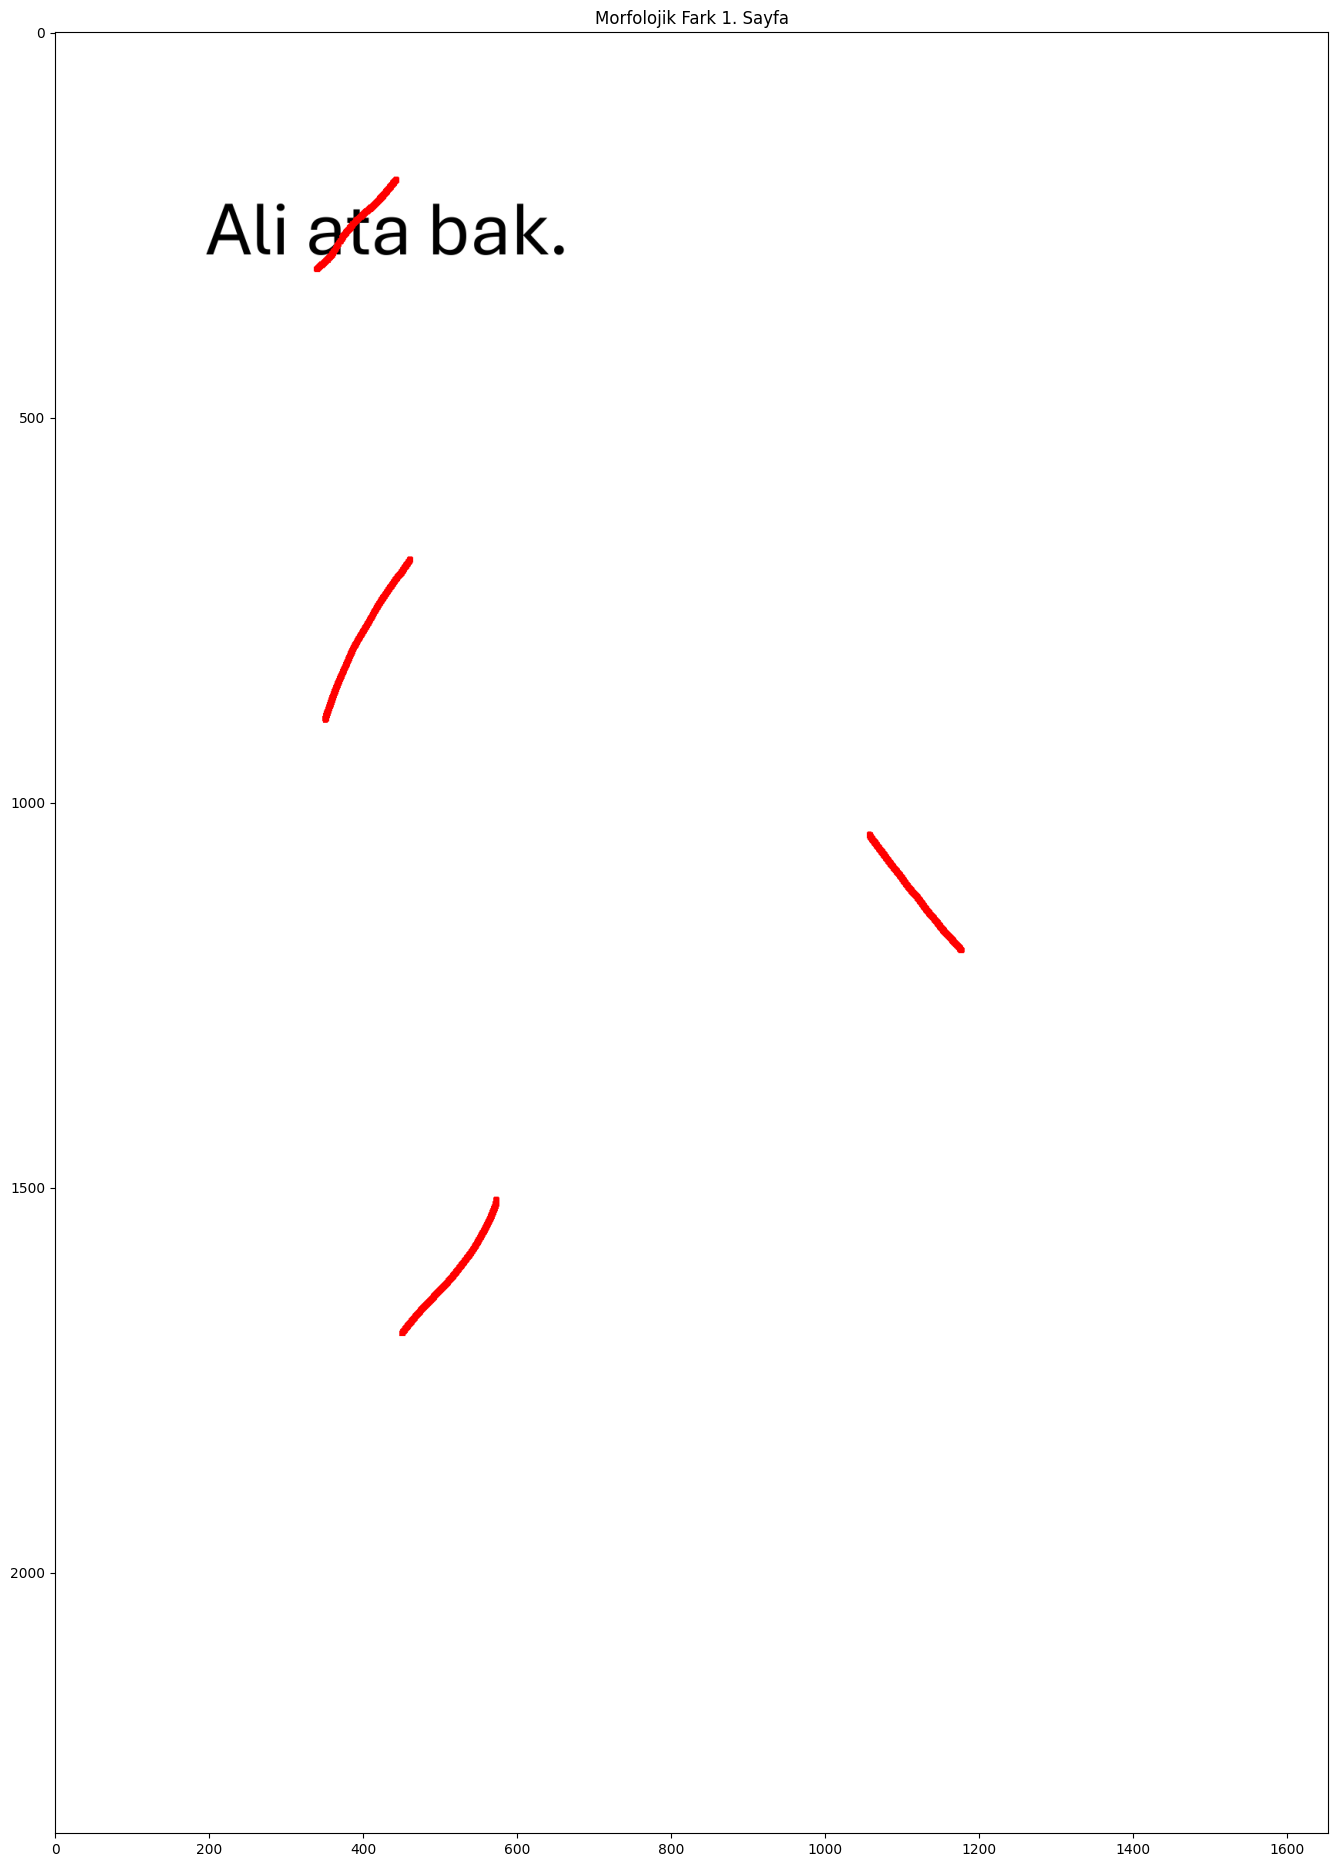

In [72]:
# 3. Fark Alanlarını Boyutlandırma (Morfolojik İşlemler)
def highlight_differences_with_morphology(image1, image2):
    # Görselleri gri tonlamalıya çevirme
    gray1 = cv2.cvtColor(np.array(image1), cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(np.array(image2), cv2.COLOR_BGR2GRAY)
    
    # Görsellerin farkını bulma
    difference = cv2.absdiff(gray1, gray2)
    
    # Farkın görselleştirilmesi
    _, diff = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)
    
    # Morfolojik genişletme işlemi
    kernel = np.ones((5, 5), np.uint8)
    diff_dilated = cv2.dilate(diff, kernel, iterations=1)
    
    # Fark olan pikselleri kırmızı renkte vurgulama
    image_diff_colored = np.array(image1).copy()
    image_diff_colored[diff_dilated != 0] = [255, 0, 0]  # Kırmızı
    
    return image_diff_colored

# İki PDF dosyasının aynı sayfalarını karşılaştırma
highlighted_diff_morph = [highlight_differences_with_morphology(img1, img2) for img1, img2 in zip(images_1, images_2)]

# Farklılıkları görselleştirme
for i, highlighted_morph in enumerate(highlighted_diff_morph):
    # Resim boyutlarına göre figsize hesaplama
    height, width = diff.shape
    dpi = 100  # DPI değeri
    figsize = (width / dpi, height / dpi)
    # Görüntü boyutunu ayarlama
    plt.figure(figsize=figsize)
    plt.imshow(highlighted_morph)
    plt.title(f'Morfolojik Fark {i+1}. Sayfa')
    plt.show()

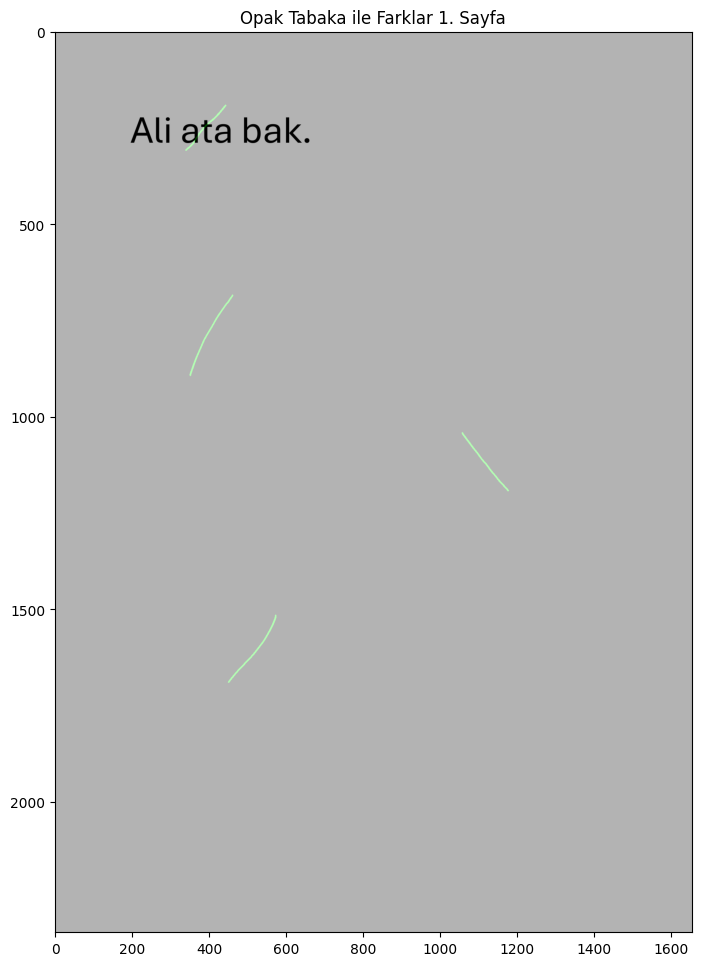

In [76]:
# 4. Değişikliklerin Üzerine Opak Bir Tabaka Ekleme
def overlay_diff(image1, image2):
    # Görselleri gri tonlamalıya çevirme
    gray1 = cv2.cvtColor(np.array(image1), cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(np.array(image2), cv2.COLOR_BGR2GRAY)
    
    # Görsellerin farkını bulma
    difference = cv2.absdiff(gray1, gray2)
    
    # Farkın görselleştirilmesi
    _, diff = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)
    
    # Kırmızı tabaka oluşturma
    red_overlay = np.zeros_like(image1)
    red_overlay[diff != 0] = [255, 0, 0]  # Kırmızı
    
    # Orijinal görsel ile kırmızı tabakayı birleştirme (opaklık)
    overlaid_image = cv2.addWeighted(np.array(image1), 0.7, red_overlay, 0.3, 0)
    
    return overlaid_image

# İki PDF dosyasının aynı sayfalarını karşılaştırma
overlaid_images = [overlay_diff(img1, img2) for img1, img2 in zip(images_1, images_2)]

# Farklılıkları görselleştirme
for i, overlaid_img in enumerate(overlaid_images):
    # Resim boyutlarına göre figsize hesaplama
    height, width = diff.shape
    dpi = 100  # DPI değeri
    figsize = (width / dpi / 2, height / dpi / 2)
    # Görüntü boyutunu ayarlama
    plt.figure(figsize=figsize)
    plt.imshow(overlaid_img)
    plt.title(f'Opak Tabaka ile Farklar {i+1}. Sayfa')
    plt.show()